In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')

In [3]:
df = pd.read_csv('Datasets/Superstore.csv')

In [4]:
print(f"Shape: {df.shape}")

Shape: (9994, 21)


In [6]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [11]:
# Check for inconsistencies
print(f"Ship Mode: {df['Ship Mode'].unique()}")
print(f"Segment: {df['Segment'].unique()}")
print(f"Region: {df['Region'].unique()}")
print(f"Category: {df['Category'].unique()}")

Ship Mode: ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment: ['Consumer' 'Corporate' 'Home Office']
Region: ['South' 'West' 'Central' 'East']
Category: ['Furniture' 'Office Supplies' 'Technology']


In [14]:
numerical_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Winsorize: cap values outside bounds
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [15]:
# Create additional useful columns
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

In [16]:
df.shape

(9994, 25)

In [17]:
# Question 1: Which category generates the highest total sales?
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(category_sales)
print(f"\nAnswer: {category_sales.idxmax()} generates the highest total sales: ${category_sales.max():,.2f}")

Category
Office Supplies    493104.0040
Furniture          480878.0084
Technology         427987.3530
Name: Sales, dtype: float64

Answer: Office Supplies generates the highest total sales: $493,104.00


In [18]:
# Question 2: Within each category, which sub-category is the most profitable?
category_subcategory_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
most_profitable_subcategory = category_subcategory_profit.loc[
    category_subcategory_profit.groupby('Category')['Profit'].idxmax()
]
print(most_profitable_subcategory)

           Category Sub-Category       Profit
2         Furniture  Furnishings  12889.57000
10  Office Supplies        Paper  28480.99065
16       Technology       Phones  24829.55230


In [19]:
# Question 3: Which region has the highest average profit per order?
region_avg_profit = df.groupby('Region')['Profit'].mean().sort_values(ascending=False)
print(region_avg_profit)
print(f"\nAnswer: {region_avg_profit.idxmax()} has the highest average profit per order: ${region_avg_profit.max():.2f}")

Region
West       19.827769
South      18.393694
East       15.421148
Central    10.055174
Name: Profit, dtype: float64

Answer: West has the highest average profit per order: $19.83


In [20]:
# Question 4: What percentage of total sales comes from each segment?
segment_sales = df.groupby('Segment')['Sales'].sum()
segment_percentage = (segment_sales / segment_sales.sum()) * 100
segment_percentage_df = pd.DataFrame({
    'Total Sales': segment_sales,
    'Percentage': segment_percentage
})
print(segment_percentage_df)

             Total Sales  Percentage
Segment                             
Consumer     719606.5338   51.328264
Corporate    431102.1318   30.749754
Home Office  251260.6998   17.921982


In [21]:
# Question 5: Identify the top 10 most profitable products
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
print(product_profit)

Product Name
Easy-staple paper                                                     1072.088350
Hot File 7-Pocket, Floor Stand                                         779.556750
Adjustable Depth Letter/Legal Cart                                     762.511800
Staple envelope                                                        701.004275
Plantronics CS510 - Over-the-Head monaural Wireless Headset System     680.245375
Standard Rollaway File with Lock                                       653.026200
Nortel Meridian M3904 Professional Digital phone                       620.450025
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back            615.331000
SAFCO Arco Folding Chair                                               596.917000
Xerox 1915                                                             596.374125
Name: Profit, dtype: float64


In [22]:
# Question 6: Which ship mode has the fastest average delivery time?
shipmode_delivery = df.groupby('Ship Mode')['Delivery Time'].mean().sort_values()
print(shipmode_delivery)
print(f"\nAnswer: {shipmode_delivery.idxmin()} has the fastest average delivery time: {shipmode_delivery.min():.2f} days")

Ship Mode
Same Day          0.044199
First Class       2.182705
Second Class      3.238046
Standard Class    5.006535
Name: Delivery Time, dtype: float64

Answer: Same Day has the fastest average delivery time: 0.04 days


In [23]:
# Question 7: Which city generates the highest total profit? Give the top 5
city_profit = df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(5)
print(city_profit)

City
New York City    22245.219175
Los Angeles      16778.201600
San Francisco    11156.618250
Seattle          10202.036825
Detroit           4217.323000
Name: Profit, dtype: float64


In [24]:
# Question 8: For each region, what is the average discount offered, and how does it correlate with profit?
region_discount_profit = df.groupby('Region').agg({
    'Discount': 'mean',
    'Profit': 'mean'
}).round(4)
print(region_discount_profit)

         Discount   Profit
Region                    
Central    0.1957  10.0552
East       0.1323  15.4211
South      0.1310  18.3937
West       0.1031  19.8278


In [25]:
# Calculate correlation
correlation = df.groupby('Region').apply(lambda x: x['Discount'].corr(x['Profit']))
print("\nCorrelation between Discount and Profit by Region:")
print(correlation)


Correlation between Discount and Profit by Region:
Region
Central   -0.631564
East      -0.552415
South     -0.539425
West      -0.273200
dtype: float64


In [26]:
# Question 9: Which product category suffers the highest loss (negative profit)?
negative_profit = df[df['Profit'] < 0].groupby('Category')['Profit'].sum().sort_values()
print(negative_profit)
if len(negative_profit) > 0:
    print(f"\nAnswer: {negative_profit.idxmin()} suffers the highest loss: ${negative_profit.min():,.2f}")
else:
    print("No category has negative profit")

Category
Furniture         -18824.596100
Office Supplies   -15240.069275
Technology         -5732.627125
Name: Profit, dtype: float64

Answer: Furniture suffers the highest loss: $-18,824.60


In [27]:
# Question 10: Is there a relationship between discount and quantity sold?
correlation_disc_qty = df['Discount'].corr(df['Quantity'])
print(f"Correlation coefficient: {correlation_disc_qty:.4f}")
if abs(correlation_disc_qty) < 0.3:
    strength = "weak"
elif abs(correlation_disc_qty) < 0.7:
    strength = "moderate"
else:
    strength = "strong"
print(f"There is a {strength} relationship between discount and quantity sold")

Correlation coefficient: 0.0044
There is a weak relationship between discount and quantity sold


In [28]:
# Question 11: What are the top 5 customers by total purchase amount?
customer_purchase = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(5)
print(customer_purchase)

Customer Name
Clay Ludtke        5794.622
Seth Vernon        5775.551
John Lee           5334.072
Laura Armstrong    5248.588
Paul Prost         5194.788
Name: Sales, dtype: float64


In [29]:
# Question 12: Which months have the highest number of orders? Show in a bar chart
monthly_orders = df.groupby('Month').size().sort_values(ascending=False)
print(monthly_orders)

Month
11    1471
12    1408
9     1383
10     819
5      735
6      717
7      710
8      706
3      696
4      668
1      381
2      300
dtype: int64


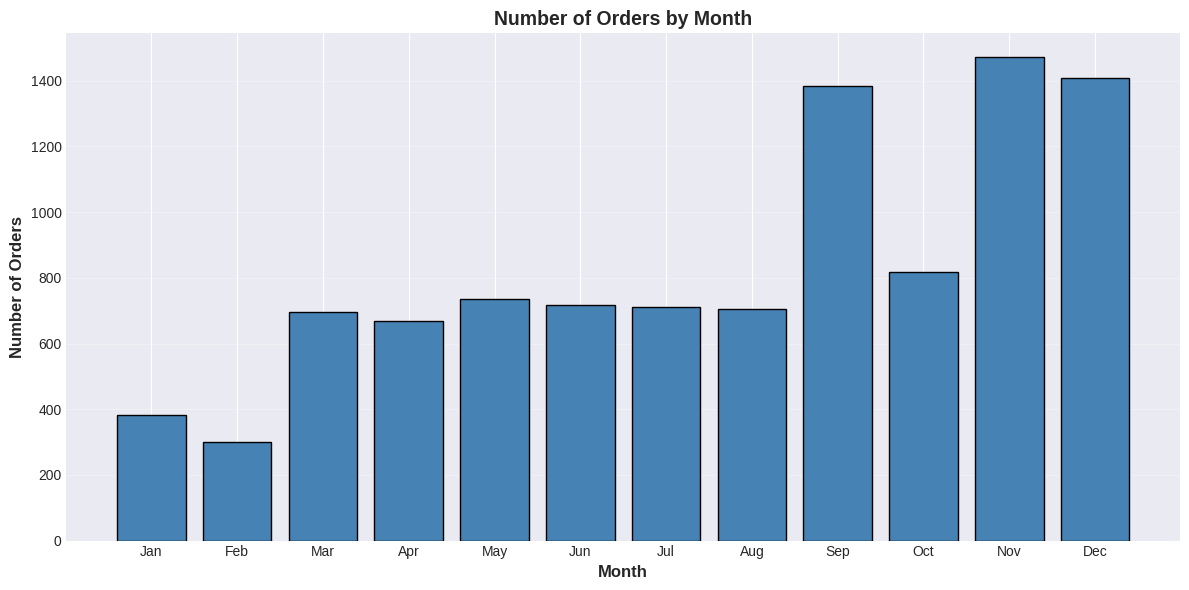

In [30]:
plt.figure(figsize=(12, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_orders_sorted = df.groupby('Month').size()
plt.bar(range(1, 13), [monthly_orders_sorted.get(i, 0) for i in range(1, 13)], color='steelblue', edgecolor='black')
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Number of Orders', fontsize=12, fontweight='bold')
plt.title('Number of Orders by Month', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), month_names)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# Question 13: Compare profit margins between first-class and same-day shipping
shipmode_profit_margin = df[df['Ship Mode'].isin(['First Class', 'Same Day'])].groupby('Ship Mode')['Profit Margin'].mean()
print(shipmode_profit_margin)

Ship Mode
First Class    12.763424
Same Day       14.417620
Name: Profit Margin, dtype: float64


In [32]:
# Question 14: Which sub-categories are consistently unprofitable across regions?
subcategory_region_profit = df.groupby(['Sub-Category', 'Region'])['Profit'].sum().reset_index()
subcategory_unprofitable = subcategory_region_profit.pivot(index='Sub-Category', columns='Region', values='Profit')
print(subcategory_unprofitable)

Region            Central         East        South          West
Sub-Category                                                     
Accessories   4449.390750  5704.384275  3707.068525   8496.290350
Appliances     481.518775  4038.472600  2348.459000   4272.849100
Art           1195.159100  1882.713925  1049.645475   2221.570975
Binders       -193.070375  3914.943700  1331.243425   6318.239225
Bookcases     -569.286650   536.321525   641.741350    770.112625
Chairs         888.398000  3773.352500  3128.545775   3374.223500
Copiers       1133.070000  1403.880375   495.718125   1748.784125
Envelopes     1423.081525  1595.676875  1259.918150   1521.079850
Fasteners      236.618600   263.990800   173.718100    275.190700
Furnishings  -1035.430325  4895.976125  2727.246000   6301.778200
Labels         877.509850  1129.280000   751.049675   1649.928000
Machines       238.662600   837.383225   103.465900   1552.577225
Paper         5825.717325  7709.115425  4730.541900  10215.616000
Phones    

In [33]:
# Find sub-categories that are unprofitable in all regions
consistently_unprofitable = subcategory_unprofitable[subcategory_unprofitable.le(0).all(axis=1)]
print("\nSub-categories consistently unprofitable across ALL regions:")
print(consistently_unprofitable)


Sub-categories consistently unprofitable across ALL regions:
Empty DataFrame
Columns: [Central, East, South, West]
Index: []


In [34]:
# Question 15: Compute the year-over-year growth of total sales and show the plot
yearly_sales = df.groupby('Year')['Sales'].sum().sort_index()
print("Total Sales by Year:")
print(yearly_sales)

Total Sales by Year:
Year
2014    284350.2301
2015    303821.9016
2016    362143.7773
2017    451653.4564
Name: Sales, dtype: float64



Year-over-Year Growth (%):
Year
2014          NaN
2015     6.847778
2016    19.196074
2017    24.716614
Name: Sales, dtype: float64


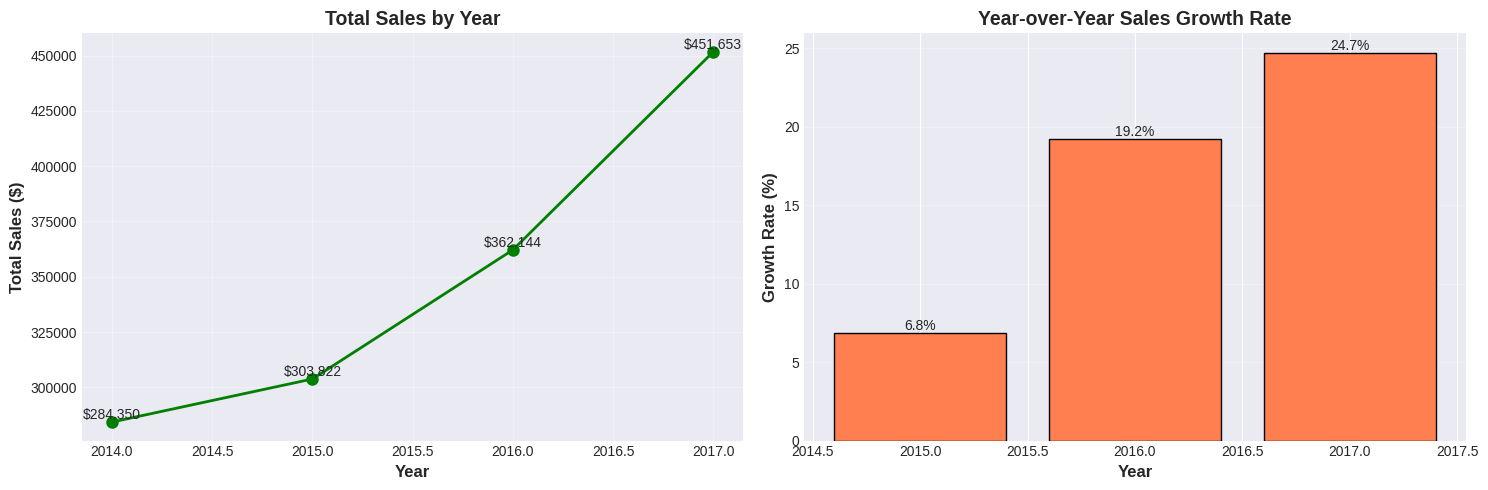

In [36]:
# Calculate YoY growth
yoy_growth = yearly_sales.pct_change() * 100
print("\nYear-over-Year Growth (%):")
print(yoy_growth)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Total Sales by Year
ax1.plot(yearly_sales.index, yearly_sales.values, marker='o', linewidth=2, markersize=8, color='green')
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')
ax1.set_ylabel('Total Sales ($)', fontsize=12, fontweight='bold')
ax1.set_title('Total Sales by Year', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
for x, y in zip(yearly_sales.index, yearly_sales.values):
    ax1.text(x, y, f'${y:,.0f}', ha='center', va='bottom')

# Plot 2: YoY Growth Rate
ax2.bar(yoy_growth.index, yoy_growth.values, color='coral', edgecolor='black')
ax2.set_xlabel('Year', fontsize=12, fontweight='bold')
ax2.set_ylabel('Growth Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Year-over-Year Sales Growth Rate', fontsize=14, fontweight='bold')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(axis='y', alpha=0.3)
for x, y in zip(yoy_growth.index, yoy_growth.values):
    if not np.isnan(y):
        ax2.text(x, y, f'{y:.1f}%', ha='center', va='bottom' if y > 0 else 'top')

plt.tight_layout()
plt.show()